# 객체지향언어와 실습 프로젝트  
### Python, Tensorflow, OpenCV를 이용한 광학 문자 인식 (OCR)  
2017112160 조민식  
2017112203 윤기복  
2017112207 이건우

# 이미지 전 처리와 문자 추출

라이브러리를 임포트하고 cv2의 버전을 확인합니다.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
print(cv2.__version__)

4.4.0


이미지를 불러오고 확인합니다. 경로와 이미지 파일 이름을 잘 확인해야합니다.

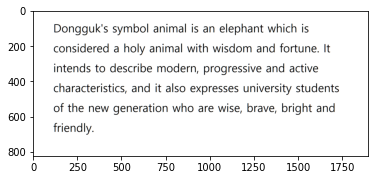

In [2]:
img= cv2.imread("ocr_image\\dongguk.png")# 경로와 파일 이름 주의

if(img is not None):
    plt.imshow(img)  
    plt.show()
else:# 이미지를 불러올 수 없다면 오류 메세지 출력
    print('Image is not loaded')

이미지 추출 전 이미지 파일이 저장될 디렉토리를 비우고 시작합니다.

In [3]:
# 줄로 추출된 이미지를 제거합니다.
path='C:\\Users\\YKB\\Desktop\\project\\' # 경로에 주의합니다.
j=0
for line in os.listdir("C:\\Users\\YKB\\Desktop\\project\\line"):
    os.remove(path+"line\\line_"+str(j).zfill(2)+".png")# 이미지 파일을 삭제합니다.
    j=j+1
    
# 추출된 단어 이미지를 삭제합니다.
path='C:\\Users\\YKB\\Desktop\\project\\'# 경로에 주의합니다.
j=0
for chunk in os.listdir("C:\\Users\\YKB\\Desktop\\project\\chunk"):
    os.remove(path+"chunk\\chunk_"+str(j).zfill(2)+".png")
    j=j+1
    
# 문자 이미지를 삭제합니다.
path='C:\\Users\\YKB\\Desktop\\project\\'
j=0
for dir in os.listdir("C:\\Users\\YKB\\Desktop\\project\\letter"):
    shutil.rmtree(path+'letter\\chunk_'+str(j).zfill(2))#이번에는 디렉토리 자체를 삭제합니다.
    j=j+1

가장 기본적인 이미지 처리 방법을 이용하여 이미지를 처리합니다. 
1. RGB 이미지를 Gray 이미지로 변환합니다.
2. 가우시안 블러를 이용해 이미지의 경계를 흐립니다. 
3. 이미지를 반전시켜 관심있는 문자를 양수로, 배경을 0으로 만듭니다.

아래의 코드 실행 시, 트랙바 이벤트가 생성됩니다. 한 줄이 하얗게 연결되게 트랙바를 조정한 뒤, 키보드 q를 눌러 트랙바 이벤트를 중단합니다.

rects: [(121, 78, 1438, 65), (118, 189, 1563, 66), (120, 302, 1493, 65), (118, 414, 1613, 65), (118, 525, 1589, 66), (117, 637, 226, 66)]
num of rects: 6


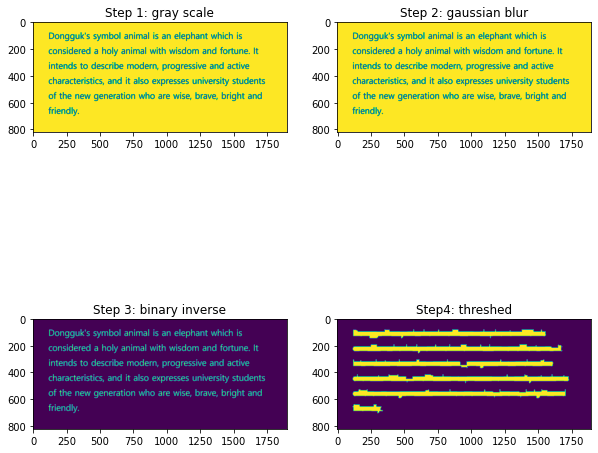

In [4]:
fig, ax=plt.subplots(2,2,figsize=(10,10))# 2행 2열 총 4개의 그림을 나타내기 위한 ax 생성

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#RGB 이미지를 Gray 이미지로 바꿉니다.
ax[0,0].imshow(img_gray)
ax[0,0].set_title('Step 1: gray scale')

img_blur = cv2.GaussianBlur(img_gray, (1, 1), 0)# 이미지를 가우시간 블러 처리합니다.
ax[0,1].imshow(img_blur)
ax[0,1].set_title('Step 2: gaussian blur')

ret, img_th = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)
# 임계값이 127이 넘어가면 0으로 만들고 그렇지 않으면 255으로 만듭니다. 반전 효과가 적용됩니다.
ax[1,0].imshow(img_th)
ax[1,0].set_title('Step 3: binary inverse')

def nothing(x):# 트렉바 이벤트를 사용하기 위한 dummy함수입니다.
    pass

cv2.namedWindow('kernel')#윈도우 창의 이름을 생성합니다.
cv2.createTrackbar('row','kernel',1,100,nothing)# 트랙바의 크기를 정합니다. 1부터 100까지 선택 가능합니다.
cv2.createTrackbar('column','kernel',1,100,nothing)
cv2.setTrackbarPos('row','kenel',1)# 트랙바의 초기값은 1로 지정합니다.
cv2.setTrackbarPos('column','kenel',1)

while cv2.waitKey(1)!=ord('q'):# 키보드 q를 누를 때까지 반복합니다: q를 누르면 종료합니다.
    row=cv2.getTrackbarPos('row','kernel')# 트랙바로 조절한 값을 변수에 저장합니다.
    column=cv2.getTrackbarPos('column','kernel')
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))#트랙바로 조정한 값을 이용해 모폴로지 연산을 수행합니다.
    img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
    cv2.imshow('kernel',img_threshed)# 수행한 결과를 실시간으로 확인할 수 있도록 보여줍니다.
cv2.destroyAllWindows()# 트랙바 이벤트가 끝나면 윈도우 창을 제거합니다.

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))# 마지막에 조정된 값을 이용해 실제로 모폴로지 연산을 수행합니다.
img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
ax[1,1].imshow(img_threshed)
ax[1,1].set_title('Step4: threshed')

contours, hierachy= cv2.findContours(img_threshed.copy(), #복제된 이미지를 이용해 윤곽선을 검출합니다.
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 바깥쪽 선만 유효하며 최소한의 점만 저장합니다.

rects = [cv2.boundingRect(each) for each in contours]#반복문을 이용해 윤곽선을 감싸는 사각형의 좌표를 리스트에 저장합니다.
rects.sort(key=lambda x : (x[1]))# 각 사각형의 좌표는 이미지 속 줄 단위를 나누는 사각형이므로 y좌표를 기준으로 정렬합니다.
print('rects:',rects) # 각 좌표는 x, y, width, height입니다. 출력하여 확인합니다. 
print('num of rects:',len(rects))#줄의 개수를 출력하여 확인합니다.

step4 그림을 확인하여 문자들이 한 줄로 연결된 경우 아래의 코드를 이용해 줄 이미지를 생성하고 line 디렉토리에 저장합니다.  
자신의 컴퓨터에 맞게 경로를 반드시 수정합니다.

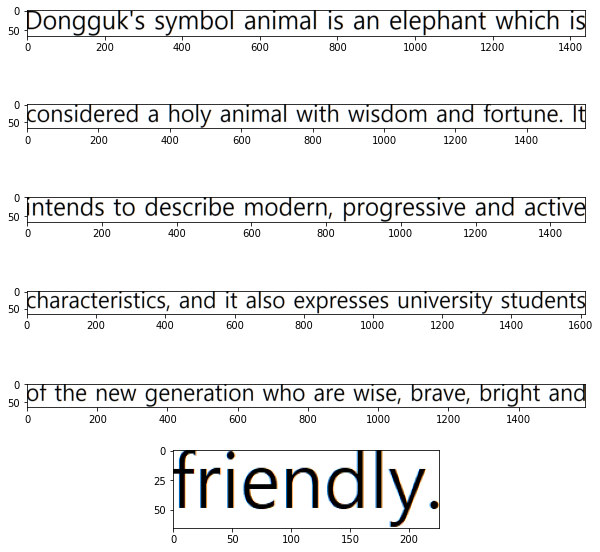

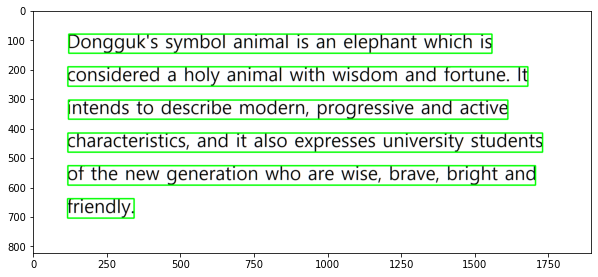

In [5]:
path='C:\\Users\\YKB\\Desktop\\project\\'# 경로에 주의합니다. 

if len(rects)>1:# 줄 단위 이미지를 보여주기 위한 조건입니다. 여러 줄인 경우 fig를 여러개 만들어야합니다.
    fig, ax=plt.subplots(len(rects),1,figsize=(10,10))

i=0
result_img=img.copy()# 원본 이미지를 복제합니다.

for rect in rects:# 모든 줄을 감싸는 사각형에 대해 반복합니다.
    cropped_img = img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]# 사각형의 x,y,w,h 정보를 이용해 이미지를 슬라이싱합니다.
    if len(rects)>1:# 줄이 여러개인 경우 슬라이싱 된 이미지를 사용자에게 보여줍니다.
        ax[i].imshow(cropped_img)
    else:#줄이 한개인 경우 슬라이싱 된 이미지를 보여줍니다.
        plt.imshow(cropped_img)
    cv2.imwrite(os.path.join(path+'line', 'line_'+str(i).zfill(2)+'.png'),cropped_img)
    # 슬라이싱 한 이미지를 해당 경로에 있는 line 디렉토리에 파일이름 line_00.png 으로 저장합니다.
    i=i+1

for rect in rects:# 원본에서 추출된 것을 비교하여 보여주기 위한 작업입니다.
    cv2.rectangle(result_img, (rect[0], rect[1]),# 원본 이미지에 추출한 좌표를 이용해 사각형을 그립니다. 시작점은 (x,y)입니다.
                 (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) #끝점은 (x+w,y+h), 색상은 녹색(0, 255, 0),  두께는 5 입니다.   

plt.figure(figsize=(10,10))
plt.imshow(result_img);

트랙바 조절에 미숙해 원하는 줄 단위 추출에 실패한 경우, 아래의 코드를 이용해 디렉토리를 비우고 다시 위의 코드를 실행해 재추출합니다.  
제대로 추출될 때까지 이 과정을 반복합니다.

In [ ]:
# 줄로 추출된 이미지를 제거합니다.
path='C:\\Users\\YKB\\Desktop\\project\\' # 경로에 주의합니다.
j=0
for line in os.listdir("C:\\Users\\YKB\\Desktop\\project\\line"):
    os.remove(path+"line\\line_"+str(j).zfill(2)+".png")# 이미지 파일을 삭제합니다.
    j=j+1

이미지 속 줄은 사용자의 프로그램 이용법과 이미지 처리 모습을 안내하기 위해 두 번의 절차를 통해 추출했습니다.  
이제 줄에서 단어를 추출합니다. 빠른 추출을 위해 하나의 절차로 줄였습니다.  
마찬가지로 트랙바 이벤트가 진행됩니다. 이번에는 가까운 문자들이 하나의 단어를 이룰 수 있도록 트랙바를 조절하고 q를 눌러 종료합니다.

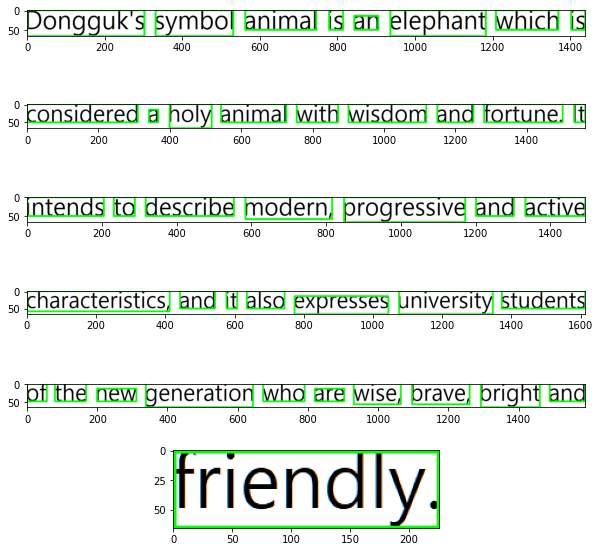

In [6]:
#이미지를 처리합니다. 앞서 했던 과정을 반복하므로 설명은 생략합니다.
row=1
column=1
example=cv2.imread("line\\line_00.png")#예시로 가장 첫 줄을 사용합니다.
example_gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
example_blur = cv2.GaussianBlur(example_gray, (1, 1), 0)
ret, example_th = cv2.threshold(example_blur, 127, 255, cv2.THRESH_BINARY_INV)

def nothing(x):
    pass

cv2.namedWindow('kernel')
cv2.createTrackbar('row','kernel',1,100,nothing)
cv2.createTrackbar('column','kernel',1,100,nothing)
cv2.setTrackbarPos('row','kenel',1)
cv2.setTrackbarPos('column','kenel',1)

while cv2.waitKey(1)!=ord('q'):
    row=cv2.getTrackbarPos('row','kernel')
    column=cv2.getTrackbarPos('column','kernel')
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))
    img_threshed = cv2.morphologyEx(example_th, cv2.MORPH_CLOSE, rect_kernel)
    cv2.imshow('kernel',img_threshed)
cv2.destroyAllWindows()


# 줄 단위에서 단어를 추출합니다.
chunk_in_line=[]#한 줄에 몇개의 단어 뭉치가 있었는지 기록합니다. 이 리스트는 텍스트 후처리에서 이용합니다.
path='C:\\Users\\YKB\\Desktop\\project\\'# 경로 주의
num=0 # 줄을 세는 변수입니다.
i=0 # 단어를 세는 변수입니다.
if len(os.listdir(path+"line"))>1:#줄이 여러개인 경우 fig를 여러개 생성합니다.
    fig,ax=plt.subplots(len(os.listdir(path+"line")),1,figsize=(10,10))

for line in os.listdir(path+"line"):# 한 줄씩 불러와 단어를 추출합니다.
    
    img= cv2.imread("line\\line_"+str(num).zfill(2)+".png")

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_blur = cv2.GaussianBlur(img_gray, (1, 1), 0)

    ret, img_th = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))
    img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
    
    contours, hierachy= cv2.findContours(img_threshed.copy(), 
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rects = [cv2.boundingRect(each) for each in contours]
    rects.sort(key=lambda x : (x[0]))# 한나의 줄에서 단어들의 사각형 좌표는 x좌표를 기준으로 정렬합니다.

    result_img=img.copy()

    for rect in rects:
        cropped_img = img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
        cv2.imwrite(os.path.join(path+'chunk', 'chunk_'+str(i).zfill(2)+'.png'),cropped_img)
        #슬라이싱 한 이미지를 해당 경로에 chunk_00.png 로 저장합니다.
        
        cv2.rectangle(result_img, (rect[0], rect[1]), 
                     (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
        i=i+1
        
    chunk_in_line.append(i)# 한 줄에서의 단어 뭉치 개수를 리스트에 저장합니다. 이때 단어 뭉치 개수는 누적 개수입니다.
    
    if len(os.listdir(path+"line")) > 1:
        ax[num].imshow(result_img)
    else:
        plt.imshow(result_img)
            
    num=num+1

누적 단어의 개수가 잘 저장되었는지 확인합니다.  
예를 들어 [1, 2, 3]이라면 첫 줄에 1단어 두 번째 줄까지 누적 2단어 세 번째 줄 까지 누적 3단어가 있다는 의미입니다.

In [7]:
chunk_in_line

[8, 17, 24, 31, 41, 42]

트랙바 조절에 미숙해 원하는 단어 단위 추출에 실패한 경우, 아래의 코드를 이용해 디렉토리를 비우고 다시 위의 코드를 실행해 재추출합니다.  
제대로 추출될 때까지 이 과정을 반복합니다.

In [ ]:
# 추출된 단어 이미지를 삭제합니다.
path='C:\\Users\\YKB\\Desktop\\project\\'# 경로에 주의합니다.
j=0
for chunk in os.listdir("C:\\Users\\YKB\\Desktop\\project\\chunk"):
    os.remove(path+"chunk\\chunk_"+str(j).zfill(2)+".png")
    j=j+1

이제 단어에서 문자를 추출합니다.  
마찬가지로 트랙바 이벤트가 진행됩니다. 이번에는 하나의 문자가 인식될 수 있도록 트랙바를 조절하고 q를 눌러 종료합니다.  
i, j 와 같은 문자의 윗부분과 아랫부분이 연결될 수 있도록 주의해야합니다.

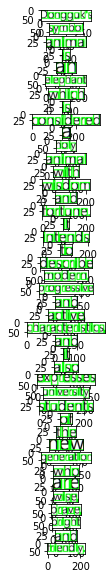

In [8]:
#이미지를 처리합니다. 앞서 했던 과정을 반복하므로 설명은 생략합니다.
row=1
column=1
example=cv2.imread("chunk\\chunk_00.png")# 예시로 chunk_00.png를 이용합니다.
example_gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
example_blur = cv2.GaussianBlur(example_gray, (1, 1), 0)
ret, example_th = cv2.threshold(example_blur, 127, 255, cv2.THRESH_BINARY_INV)

def nothing(x):
    pass

cv2.namedWindow('kernel')
cv2.createTrackbar('row','kernel',1,100,nothing)
cv2.createTrackbar('column','kernel',1,100,nothing)
cv2.setTrackbarPos('row','kenel',1)
cv2.setTrackbarPos('column','kenel',1)

while cv2.waitKey(1)!=ord('q'):
    row=cv2.getTrackbarPos('row','kernel')
    column=cv2.getTrackbarPos('column','kernel')
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))
    img_threshed = cv2.morphologyEx(example_th, cv2.MORPH_CLOSE, rect_kernel)
    cv2.imshow('kernel',img_threshed)
cv2.destroyAllWindows()

# 단어에서 문자를 추출합니다.
letter_in_chunk=[]#단어 속 문자의 개수를 저장하는 리스트입니다. 텍스트 후처리에서 사용합니다.
path='C:\\Users\\YKB\\Desktop\\project\\'# 경로에 주의합니다.
num=0
if len(os.listdir(path+"chunk"))>1:
    fig,ax=plt.subplots(len(os.listdir(path+"chunk")),1,figsize=(10,10))

for chunk in os.listdir(path+"chunk"):# 단어 뭉치 마다 반복합니다.
    
    img= cv2.imread("chunk\\chunk_"+str(num).zfill(2)+".png")

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    ret, img_th = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))
    img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
    
    contours, hierachy= cv2.findContours(img_threshed.copy(), 
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rects = [cv2.boundingRect(each) for each in contours]
    rects.sort(key=lambda x : (x[0]))

    result_img=img.copy()

    i=0
    os.mkdir(path+"letter\\chunk_"+str(num).zfill(2))#이번에는 저장할 때 단어 디렉토리를 만들고 디렉토리별로 문자를 저장합니다.
    
    for rect in rects:
        cropped_img = img_th[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
        cv2.imwrite(os.path.join(path+'letter\\chunk_'+str(num).zfill(2), 'letter_'+str(i).zfill(2)+'.png'),cropped_img)
        
        cv2.rectangle(result_img, (rect[0], rect[1]), 
                     (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
        i=i+1
        
    letter_in_chunk.append(i)# 단어 속 문자 개수를 저장합니다. 이번에는 누적이 아님을 주의합니다.
    
    if len(os.listdir(path+"chunk")) > 1:
        ax[num].imshow(result_img)
    else:
        plt.imshow(result_img)
    num=num+1

단어 속 문자의 개수를 확인합니다. [1, 2, 3]이라면 첫 단어에 1문자 두 번째 단어에 2문자 세 번째 단어에 3문자가 있음을 의미합니다.

In [9]:
letter_in_chunk

[9,
 6,
 6,
 2,
 2,
 8,
 5,
 2,
 10,
 1,
 4,
 6,
 4,
 6,
 3,
 8,
 2,
 7,
 2,
 8,
 7,
 11,
 3,
 6,
 16,
 3,
 2,
 4,
 9,
 10,
 8,
 2,
 3,
 3,
 10,
 3,
 3,
 5,
 6,
 6,
 3,
 9]

트랙바 조절에 미숙해 원하는 문자 추출에 실패한 경우, 아래의 코드를 이용해 디렉토리를 비우고 다시 위의 코드를 실행해 재추출합니다.
제대로 추출될 때까지 이 과정을 반복합니다.

In [ ]:
# 문자 이미지를 삭제합니다.
path='C:\\Users\\YKB\\Desktop\\project\\'
j=0
for dir in os.listdir("C:\\Users\\YKB\\Desktop\\project\\letter"):
    shutil.rmtree(path+'letter\\chunk_'+str(j).zfill(2))#이번에는 디렉토리 자체를 삭제합니다.
    j=j+1

추출된 문자 이미지를 패딩하고 28*28 사이즈로 통일시킵니다. 

In [10]:
for dir in os.listdir(path+"letter"):#letter 디렉토리안에 있는 chunk별 디렉토리에서
    for letter in os.listdir(path+"letter\\"+dir):#문자마다 반복합니다.
        image=cv2.imread("letter\\"+dir+"\\"+letter)
        image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#gray 이미지로 바꾼 뒤
        
        width=image.shape[1]#너비는 이미지의 열 갯수입니다.
        height=image.shape[0]# 높이는 이미지의 행 개수입니다.
        half_width=round(width/2)
        half_height=round(height/2)
        q1_height=round(height/4)
        q1_width=round(width/4)
        q3_height=round(height*3/4)
        q3_width=round(width*3/4)
        
        if(height>width):# 높이가 더 긴 문자의 경우     
            image=np.pad(image, ((q1_height,q1_height),(q3_height-half_width,q3_height-half_width)),'constant')
        elif(width>=height):# 너비가 더 긴 문자의 경우
            image=np.pad(image, ((q3_width-half_height,q3_width-half_height),(q1_width,q1_width)),'constant')
            
        image=cv2.resize(image,(28,28),0,0,interpolation=cv2.INTER_AREA)# 사이즈를 통일합니다.
        cv2.imwrite(os.path.join(path+'letter\\'+dir,letter),image)#같은 경로에 같은 이름으로 저장합니다: 덮어쓰기

# 훈련 데이터 셋 생성

이미지 훈련에 이용되는 라이브러리를 임포트하고 버전을 확인합니다.

In [11]:
import keras
import tensorflow as tf
print(tf.__version__)

2.3.1


미리 준비한 테스트 데이터셋 리스트를 확인합니다.

In [12]:
path = 'C:\\Users\\YKB\\Desktop\\project\\data'
trainfiledir = os.listdir(path)
trainfiledir

['0_arial.png',
 '0_arialnarrow.png',
 '0_bahnschrift.png',
 '0_bookantique.png',
 '0_calibri.png',
 '0_cambria.png',
 '0_garamond.png',
 '0_sylfaen.png',
 '0_timesnewroman.png',
 '0_trebuchetms.png',
 '0_verdana.png',
 '1_arial.png',
 '1_arialnarrow.png',
 '1_bahnschrift.png',
 '1_bookantique.png',
 '1_calibri.png',
 '1_cambria.png',
 '1_garamond.png',
 '1_mingliu-extb.png',
 '1_sylfaen.png',
 '1_timesnewroman.png',
 '1_trebuchetms.png',
 '1_verdana.png',
 '2_arialnarrow.png',
 '2_bookantique.png',
 '2_calibri.png',
 '2_cambria.png',
 '2_garamond.png',
 '2_trebuchetms.png',
 '2_verdana.png',
 '3_arial.png',
 '3_arialnarrow.png',
 '3_bahnschrift.png',
 '3_bookantique.png',
 '3_calibri.png',
 '3_cambria.png',
 '3_garamond.png',
 '3_sylfaen.png',
 '3_timesnewroman.png',
 '3_trebuchetms.png',
 '3_verdana.png']

테스트 데이터셋을 한 디렉토리에 모두 모으는 작업입니다. 이 작업은 이미 실행된 경우 실행하지 않아도 무방합니다.

In [ ]:
# 폰트별 데이터 파일을 데이터셋 디렉토리로 복사합니다.
i=0
for dir in trainfiledir:
    for file in os.listdir(path+'\\'+dir):
        img= cv2.imread("data\\"+dir+"\\"+file)
        cv2.imwrite(os.path.join(path+'_set', file) ,img)
        i=i+1

훈련 데이터셋을 정의합니다.

In [13]:
trainfilelist = os.listdir(path+'_set')

훈련 데이터 셋을 확인합니다.

In [14]:
# 처음 다섯개를 확인합니다.
print(trainfilelist[0:5])
# 전체 훈련 데이터 셋의 개수를 확인합니다.
len(trainfilelist)

['00_0_arial.png.png', '00_0_arialnarrow.png.png', '00_0_bahnschrift.png.png', '00_0_bookantique.png.png', '00_0_calibri.png.png']


3198

사전에 준비한 라벨 파일을 읽고 리스트로 저장해둡니다. 라벨 파일에서는 정수 인코딩을 이용합니다. 라벨은 총 78개입니다.

In [15]:
f=open('label.txt','r')
label1=f.readlines()
len(label1)

78

라벨 리스트에서 널문자를 제거합니다.

In [16]:
label2=[]
for i in range(len(label1)):
    label2.append(label1[i].replace('\n',''))
label2

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '.',
 ',',
 '?',
 '!',
 ':',
 ';',
 "'",
 '"',
 '-',
 '+',
 '=',
 '~',
 '@',
 '#',
 '%',
 '&']

훈련 데이터셋을 생성합니다.

In [17]:
import numpy as np
from keras.utils import np_utils

i=0
for file in trainfilelist:
    label,font_style,font=file.split('_')# 언더바를 기준으로 분리했을 때, 앞의 숫자는 라벨입니다.
    label=int(label)#정수화합니다.
    
    #이미지를 gray scale로 로드하고 배열화합니다.
    img=keras.preprocessing.image.load_img('C:\\Users\\YKB\\Desktop\\project\\data_set\\'+file,color_mode='grayscale')
    array=keras.preprocessing.image.img_to_array(img)
    
    img = array.reshape((1,)+array.shape)#배열의 형태를 훈련에 용이하게 바꿉니다. 
    
    if i==0:#임시 리스트를 생성하고 훈련 데이터를 수집합니다.
        temp_img=img
        temp_label=label
    else:
        temp_img=np.vstack([temp_img,img])
        temp_label=np.vstack([temp_label,label])
    
    i=i+1
    
train_img=temp_img# 수집이 끝난 뒤 임시 리스트를 훈련 데이터셋으로 이용합니다.
train_label=np_utils.to_categorical(temp_label)# 훈련에 용이하게 원핫 인코딩으로 바꿉니다.

훈련 이미지 셋의 모양을 확인합니다.

In [18]:
train_img.shape

(3198, 28, 28, 1)

라벨 셋의 모양을 확인합니다.

In [19]:
train_label.shape

(3198, 78)

모델의 가중치가 과하게 커지는 것을 방지하기 위해 정규화합니다.

In [20]:
train_img=train_img/255

라벨 셋을 확인해봅니다.

In [21]:
train_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# CNN 모델 생성과 훈련

모델을 생성하고 훈련시킵니다.

In [22]:
from keras.layers import *

In [27]:
model = keras.Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same',
                input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(78, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
history = model.fit(train_img, train_label,
                    epochs=12, batch_size=32)

Epoch 1/12
100/100 [==============================] - 4s 43ms/step - loss: 4.2060 - accuracy: 0.0394
Epoch 2/12
100/100 [==============================] - 5s 45ms/step - loss: 2.4794 - accuracy: 0.3168
Epoch 3/12
100/100 [==============================] - 4s 45ms/step - loss: 1.2867 - accuracy: 0.6051
Epoch 4/12
100/100 [==============================] - 4s 44ms/step - loss: 0.8543 - accuracy: 0.7280
Epoch 5/12
100/100 [==============================] - 4s 44ms/step - loss: 0.5947 - accuracy: 0.7999
Epoch 6/12
100/100 [==============================] - 4s 44ms/step - loss: 0.5101 - accuracy: 0.8246
Epoch 7/12
100/100 [==============================] - 4s 45ms/step - loss: 0.4281 - accuracy: 0.8412
Epoch 8/12
100/100 [==============================] - 5s 46ms/step - loss: 0.3880 - accuracy: 0.8546
Epoch 9/12
100/100 [==============================] - 5s 46ms/step - loss: 0.3422 - accuracy: 0.8696
Epoch 10/12
100/100 [==============================] - 5s 47ms/step - loss: 0.3110 - accura

로스와 정확도의 변화를 그래프로 확인합니다.

Text(0.5, 1.0, 'accuracy')

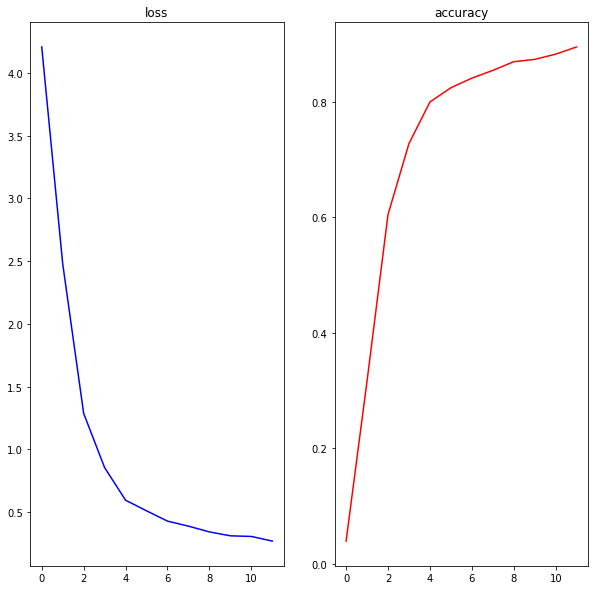

In [31]:
fig,ax=plt.subplots(1,2,figsize=(10,10))

loss=history.history['loss']
accuracy=history.history['accuracy']
epochs=range(len(loss))
ax[0].plot(epochs,loss,'b')
ax[0].set_title('loss')
ax[1].plot(epochs,accuracy,'r')
ax[1].set_title('accuracy')


# 검증 데이터 셋 생성과 모델 평가

훈련 데이터 셋 생성과정을 반복하여 이번에는 검증 데이터 셋을 생성하고 모델을 평가합니다.  
우선 valid data 리스트를 확인합니다.

In [32]:
path = 'C:\\Users\\YKB\\Desktop\\project\\valid_data'
validfiledir = os.listdir(path)
validfiledir

['0_georgia.png',
 '1_microsoftyahei.png',
 '2_georgia.png',
 '3_microsoftyahei.png']

검증 데이터셋을 한 디렉토리에 모두 모으는 작업입니다. 이 작업은 이미 실행된 경우 실행하지 않아도 무방합니다.

In [33]:
# 폰트별 데이터 파일을 데이터셋 디렉토리로 복사합니다.
i=0
for dir in validfiledir:
    for file in os.listdir(path+'\\'+dir):
        img= cv2.imread("valid_data\\"+dir+"\\"+file)
        cv2.imwrite(os.path.join(path+'_set', file) ,img)
        i=i+1

검증 데이터 리스트를 정의하고 확인합니다.

In [51]:
validfilelist = os.listdir(path+'_set')

In [52]:
# 처음 다섯개를 확인합니다.
print(validfilelist[0:5])
# 전체 검증 데이터 셋의 개수를 확인합니다.
len(validfilelist)

['00_0_georgia.png.png', '00_1_microsoftyahei.png.png', '00_2_georgia.png.png', '00_3_microsoftyahei.png.png', '01_0_georgia.png.png']


312

검증 데이터 셋을 생성합니다.

In [53]:
i=0
for file in validfilelist:
    label,font_style,font=file.split('_')# 언더바를 기준으로 분리했을 때, 앞의 숫자는 라벨입니다.
    label=int(label)#정수화합니다.
    
    #이미지를 gray scale로 로드하고 배열화합니다.
    img=keras.preprocessing.image.load_img('C:\\Users\\YKB\\Desktop\\project\\valid_data_set\\'+file,color_mode='grayscale')
    array=keras.preprocessing.image.img_to_array(img)
    
    img = array.reshape((1,)+array.shape)#배열의 형태를 훈련에 용이하게 바꿉니다. 
    
    if i==0:#임시 리스트를 생성하고 훈련 데이터를 수집합니다.
        temp_img=img
        temp_label=label
    else:
        temp_img=np.vstack([temp_img,img])
        temp_label=np.vstack([temp_label,label])
    
    i=i+1
    
valid_img=temp_img # 수집이 끝난 뒤 임시 리스트를 검증 데이터셋으로 이용합니다.
valid_label=temp_label #이번에는 모델 예측결과와 실제 라벨을 비교해야하므로 정수 인코딩을 이용합니다.
valid_label2=np_utils.to_categorical(temp_label)# model.evaluate를 이용해 모델을 평가할 수도 있습니다.

검증 이미지 셋의 모양을 확인합니다.

In [54]:
valid_img.shape

(312, 28, 28, 1)

검증 데이터의 라벨과 라벨의 모양을 확인합니다.

In [55]:
valid_label.shape

(312, 1)

In [56]:
valid_label

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10],
       [10],
       [10],
       [11],
       [11],
       [11],
       [11],
       [12],
       [12],
       [12],
       [12],
       [13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [15],
       [15],
       [15],
       [15],
       [16],
       [16],
       [16],
       [16],
       [17],
       [17],
       [17],
       [17],
       [18],
       [18],
       [18],
       [18],
       [19],

정규화 합니다.

In [57]:
valid_img=valid_img/255

모델을 이용해 예측하고 가장 높은 예측 값을 결과로 이용합니다.

In [58]:
valid_result=model.predict(valid_img,batch_size=1)
valid_result=np.argmax(valid_result,axis=-1)# 가장 높은 값을 결과로 이용

다음과 같은 결과가 나왔습니다.

In [59]:
valid_result

array([24,  0, 50,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16,
       17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       44, 21, 44, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25,
       25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 54, 28, 29, 29, 29,
       29, 30, 30, 30, 30, 57, 31, 56, 57, 58, 32, 32, 58, 59, 33, 33, 59,
       34, 34, 34, 34, 61, 35, 61, 35, 36, 36, 36, 36, 37, 37, 37, 37, 12,
       38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42,
       42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46,
       46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 24, 24, 50, 50,
       51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 28, 54, 54, 54, 55,
       55, 55, 55, 56, 56

이제 예측된 라벨을 실제 라벨과 비교하여 맞게 예측한 경우를 세고 이를 이용해 검증 데이터의 정확도를 구합니다.

In [60]:
correct=0
i=0
for i in range(len(valid_result)):
    if(valid_result[i]==valid_label[i]):#실제 라벨과 예측 라벨이 같으면
        correct+=1

val_acc=round(correct/len(valid_result)*100,2)# 검증 정확도 계산
print('val_acc = {0} %'.format(val_acc))

val_acc = 93.91 %


이번에는 model.evaluate 를 이용해 모델을 평가합니다. 이 과정은 생략해도 좋습니다.

In [61]:
valid_history=model.evaluate(valid_img, valid_label2)

10/10 [==============================] - 0s 10ms/step - loss: 0.1630 - accuracy: 0.9391


# 테스트 데이터 생성과 예측

훈련 데이터 생성 과정을 반복합니다. 다만 테스트 데이터 셋은 라벨이 없습니다.

In [62]:
testfilelist = os.listdir('C:\\Users\\YKB\\Desktop\\project\\letter')

In [63]:
j=0
for dir in testfilelist:
    print(dir)
    for file in os.listdir('C:\\Users\\YKB\\Desktop\\project\\letter\\'+dir):
        print("   "+file)
        
        img=keras.preprocessing.image.load_img('C:\\Users\\YKB\\Desktop\\project\\letter\\'+dir+'\\'+file,color_mode='grayscale')
        array=keras.preprocessing.image.img_to_array(img)
    
        img = array.reshape((1,)+array.shape)
    
        if j==0:
            temp_img=img
        else:
            temp_img=np.vstack([temp_img,img])
        j=j+1
        
test_img=temp_img

chunk_00
   letter_00.png
   letter_01.png
   letter_02.png
   letter_03.png
   letter_04.png
   letter_05.png
   letter_06.png
   letter_07.png
   letter_08.png
chunk_01
   letter_00.png
   letter_01.png
   letter_02.png
   letter_03.png
   letter_04.png
   letter_05.png
chunk_02
   letter_00.png
   letter_01.png
   letter_02.png
   letter_03.png
   letter_04.png
   letter_05.png
chunk_03
   letter_00.png
   letter_01.png
chunk_04
   letter_00.png
   letter_01.png
chunk_05
   letter_00.png
   letter_01.png
   letter_02.png
   letter_03.png
   letter_04.png
   letter_05.png
   letter_06.png
   letter_07.png
chunk_06
   letter_00.png
   letter_01.png
   letter_02.png
   letter_03.png
   letter_04.png
chunk_07
   letter_00.png
   letter_01.png
chunk_08
   letter_00.png
   letter_01.png
   letter_02.png
   letter_03.png
   letter_04.png
   letter_05.png
   letter_06.png
   letter_07.png
   letter_08.png
   letter_09.png
chunk_09
   letter_00.png
chunk_10
   letter_00.png
   letter_01.png


테스트 데이터셋 모양을 확인합니다.

In [64]:
test_img.shape

(233, 28, 28, 1)

정규화합니다.

In [65]:
test_img=test_img/255

모델을 이용해 예측하고 가장 높게 예측된 값을 결과로 이용합니다.

In [66]:
result=model.predict(test_img,batch_size=1)
percent=result#퍼센트는 두 번째, 세 번째 등으로 높은 예측값을 알아보기 위해 이용됩니다.
result=np.argmax(result,axis=-1)# 가장 높은 값을 결과로 이용

어떠한 확률로 예측했는지 알아 보는 과정입니다. 이 과정을 생략해도 좋습니다.

In [67]:
for i in range(test_img.shape[0]):
    print('< {0}번째 문자 >'.format(i))
    for j in range(percent.shape[1]):
        if percent[i][j]*100>5: # 5퍼센트 이상인 확률을 모두 나타냅니다.
            if j<10:
                category='  숫자'
            elif j<36:
                category='소문자'
            elif j<62:
                category='대문자'
            else:
                category='기호'
            print(category,label2[j],'{0}%\n'.format(round(percent[i][j]*100,2)),end='')
    print('----------------------')

< 0번째 문자 >
대문자 D 98.2%
----------------------
< 1번째 문자 >
소문자 o 72.02%
대문자 O 27.91%
----------------------
< 2번째 문자 >
소문자 n 99.92%
----------------------
< 3번째 문자 >
소문자 g 99.39%
----------------------
< 4번째 문자 >
소문자 g 99.39%
----------------------
< 5번째 문자 >
소문자 u 95.6%
----------------------
< 6번째 문자 >
소문자 k 99.97%
----------------------
< 7번째 문자 >
소문자 l 15.21%
대문자 I 12.56%
기호 ' 65.83%
----------------------
< 8번째 문자 >
  숫자 5 11.62%
소문자 s 21.8%
대문자 S 66.54%
----------------------
< 9번째 문자 >
소문자 s 30.19%
대문자 S 67.83%
----------------------
< 10번째 문자 >
소문자 y 99.92%
----------------------
< 11번째 문자 >
소문자 m 99.98%
----------------------
< 12번째 문자 >
소문자 b 99.85%
----------------------
< 13번째 문자 >
소문자 o 72.02%
대문자 O 27.91%
----------------------
< 14번째 문자 >
소문자 l 44.24%
대문자 I 51.34%
----------------------
< 15번째 문자 >
소문자 a 99.97%
----------------------
< 16번째 문자 >
소문자 n 99.92%
----------------------
< 17번째 문자 >
소문자 i 99.07%
----------------------
< 18번째 문자 >
소문자 m 99.98%
--------------------

# 텍스트 후처리

문자 추출에서 기록한 줄 속 단어의 누적 개수와 단어 속 문자 개수를 확인합니다.

In [68]:
chunk_in_line

[8, 17, 24, 31, 41, 42]

In [69]:
letter_in_chunk

[9,
 6,
 6,
 2,
 2,
 8,
 5,
 2,
 10,
 1,
 4,
 6,
 4,
 6,
 3,
 8,
 2,
 7,
 2,
 8,
 7,
 11,
 3,
 6,
 16,
 3,
 2,
 4,
 9,
 10,
 8,
 2,
 3,
 3,
 10,
 3,
 3,
 5,
 6,
 6,
 3,
 9]

dummy value를 이용해 적절한 위치에 띄어쓰기와 줄바꿈을 추가합니다.

In [70]:
p=0 # 단어 속 문자 개수를 카운트 (띄어쓰기 포함)
q=0 # 단어 개수를 카운트
r=0 # 줄의 개수를 카운트
for i in result:# 결과를 하나씩 읽는다.       
    if p==letter_in_chunk[q]:# p가 단어 속 문자의 개수와 일치하면: 단어 하나가 읽혔으면
        p=0 # p는 초기화 왜냐하면 단어 속 문자의 개수는 누적이 아니기 때문
        q=q+1 # 단어는 하나를 센다
        if q==chunk_in_line[r]: # q가 줄 속 누적 단어의 개수와 일치하면 : 한 줄을 다 읽었으면
            r=r+1 # 줄 하나를 센다.
            print("\n",end='') # 줄바꿈을 한다.
        else: # 단어 하나를 읽었는데 그 단어가 줄의 끝이 아니면
            print(" ", end='') # 띄어쓰기만 한다.
    print(label2[i],end='')# 위의 경우가 아니면 라벨을 이용해 문자를 쓴다.
    p=p+1 # 문자 카운트

Dongguk'S SymboI animaI iS an eIephant WhiCh iS
ConSidered a hoIy animaI With WiSdom and fortune. lt
intendS to deSCribe mOdern' progreSSiVe and aCtiVe
CharaCteri5tiC5' and it aISo eXpreSSeS uniVerSity StudentS
of the neW generation Who are Wi5e' braVe' bright and
friendIy.

아래의 과정은 이미지가 문장인 경우 가독성을 좋게 만드는 과정입니다.   
예를 들어 모든 문자를 소문자로 바꾸거나 문자열의 시작만 대문자로 바꿉니다.  
이 부분은 생략해도 좋습니다.

## 결과를 복제하여 sentance 생성

In [71]:
sentance=''
p=0
q=0
r=0
for i in result:       
    if p==letter_in_chunk[q]:
        p=0
        q=q+1
        if q==chunk_in_line[r]:
            r=r+1
            print("\n",end='')
            sentance+=' '
        else:
            print(" ", end='')
            sentance+=' '
    print(label2[i],end='')
    sentance+=label2[i]
    p=p+1

Dongguk'S SymboI animaI iS an eIephant WhiCh iS
ConSidered a hoIy animaI With WiSdom and fortune. lt
intendS to deSCribe mOdern' progreSSiVe and aCtiVe
CharaCteri5tiC5' and it aISo eXpreSSeS uniVerSity StudentS
of the neW generation Who are Wi5e' braVe' bright and
friendIy.

## 1. 문자열의 시작만 대문자로

In [72]:
sentance=sentance.capitalize()

In [73]:
p=0
q=0
r=0
for i in sentance:
    if(sentance[p]==" "):
        q+=1
    if q==chunk_in_line[r]:
        r=r+1
        i=''
        print("\n",end='')
    print(i,end='')
    p=p+1

Dongguk's symboi animai is an eiephant which is
considered a hoiy animai with wisdom and fortune. lt
intends to describe modern' progressive and active
characteri5tic5' and it aiso expresses university students
of the new generation who are wi5e' brave' bright and
friendiy.

## 2. 모든 문자를 소문자로

In [74]:
sentance=sentance.lower()

In [75]:
p=0
q=0
r=0
for i in sentance:
    if(sentance[p]==" "):
        q+=1
    if q==chunk_in_line[r]:
        r=r+1
        i=''
        print("\n",end='')
    print(i,end='')
    p=p+1

dongguk's symboi animai is an eiephant which is
considered a hoiy animai with wisdom and fortune. lt
intends to describe modern' progressive and active
characteri5tic5' and it aiso expresses university students
of the new generation who are wi5e' brave' bright and
friendiy.